In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np


In [6]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
file_paths = {
    "Colitis_Ulcerative": os.path.join(project_root, "data/standardized/Colitis&Ulcerative_combined.csv"),
    "Crohn_Disease": os.path.join(project_root, "data/standardized/Crohn_Disease_combined.csv"), 
    "Health": os.path.join(project_root, "data/standardized/Health_combined.csv"),
    "Obesity": os.path.join(project_root, "data/standardized/Obesity_combined.csv")
}


In [7]:
df_list = []
for label, path in file_paths.items():
    df = pd.read_csv(path)
    df['label'] = label  # 为每个数据集添加label字段，表示疾病类型
    df_list.append(df)

In [8]:
combined_df = pd.concat(df_list, ignore_index=True)

In [9]:
abundance_columns = combined_df.columns[5:14]

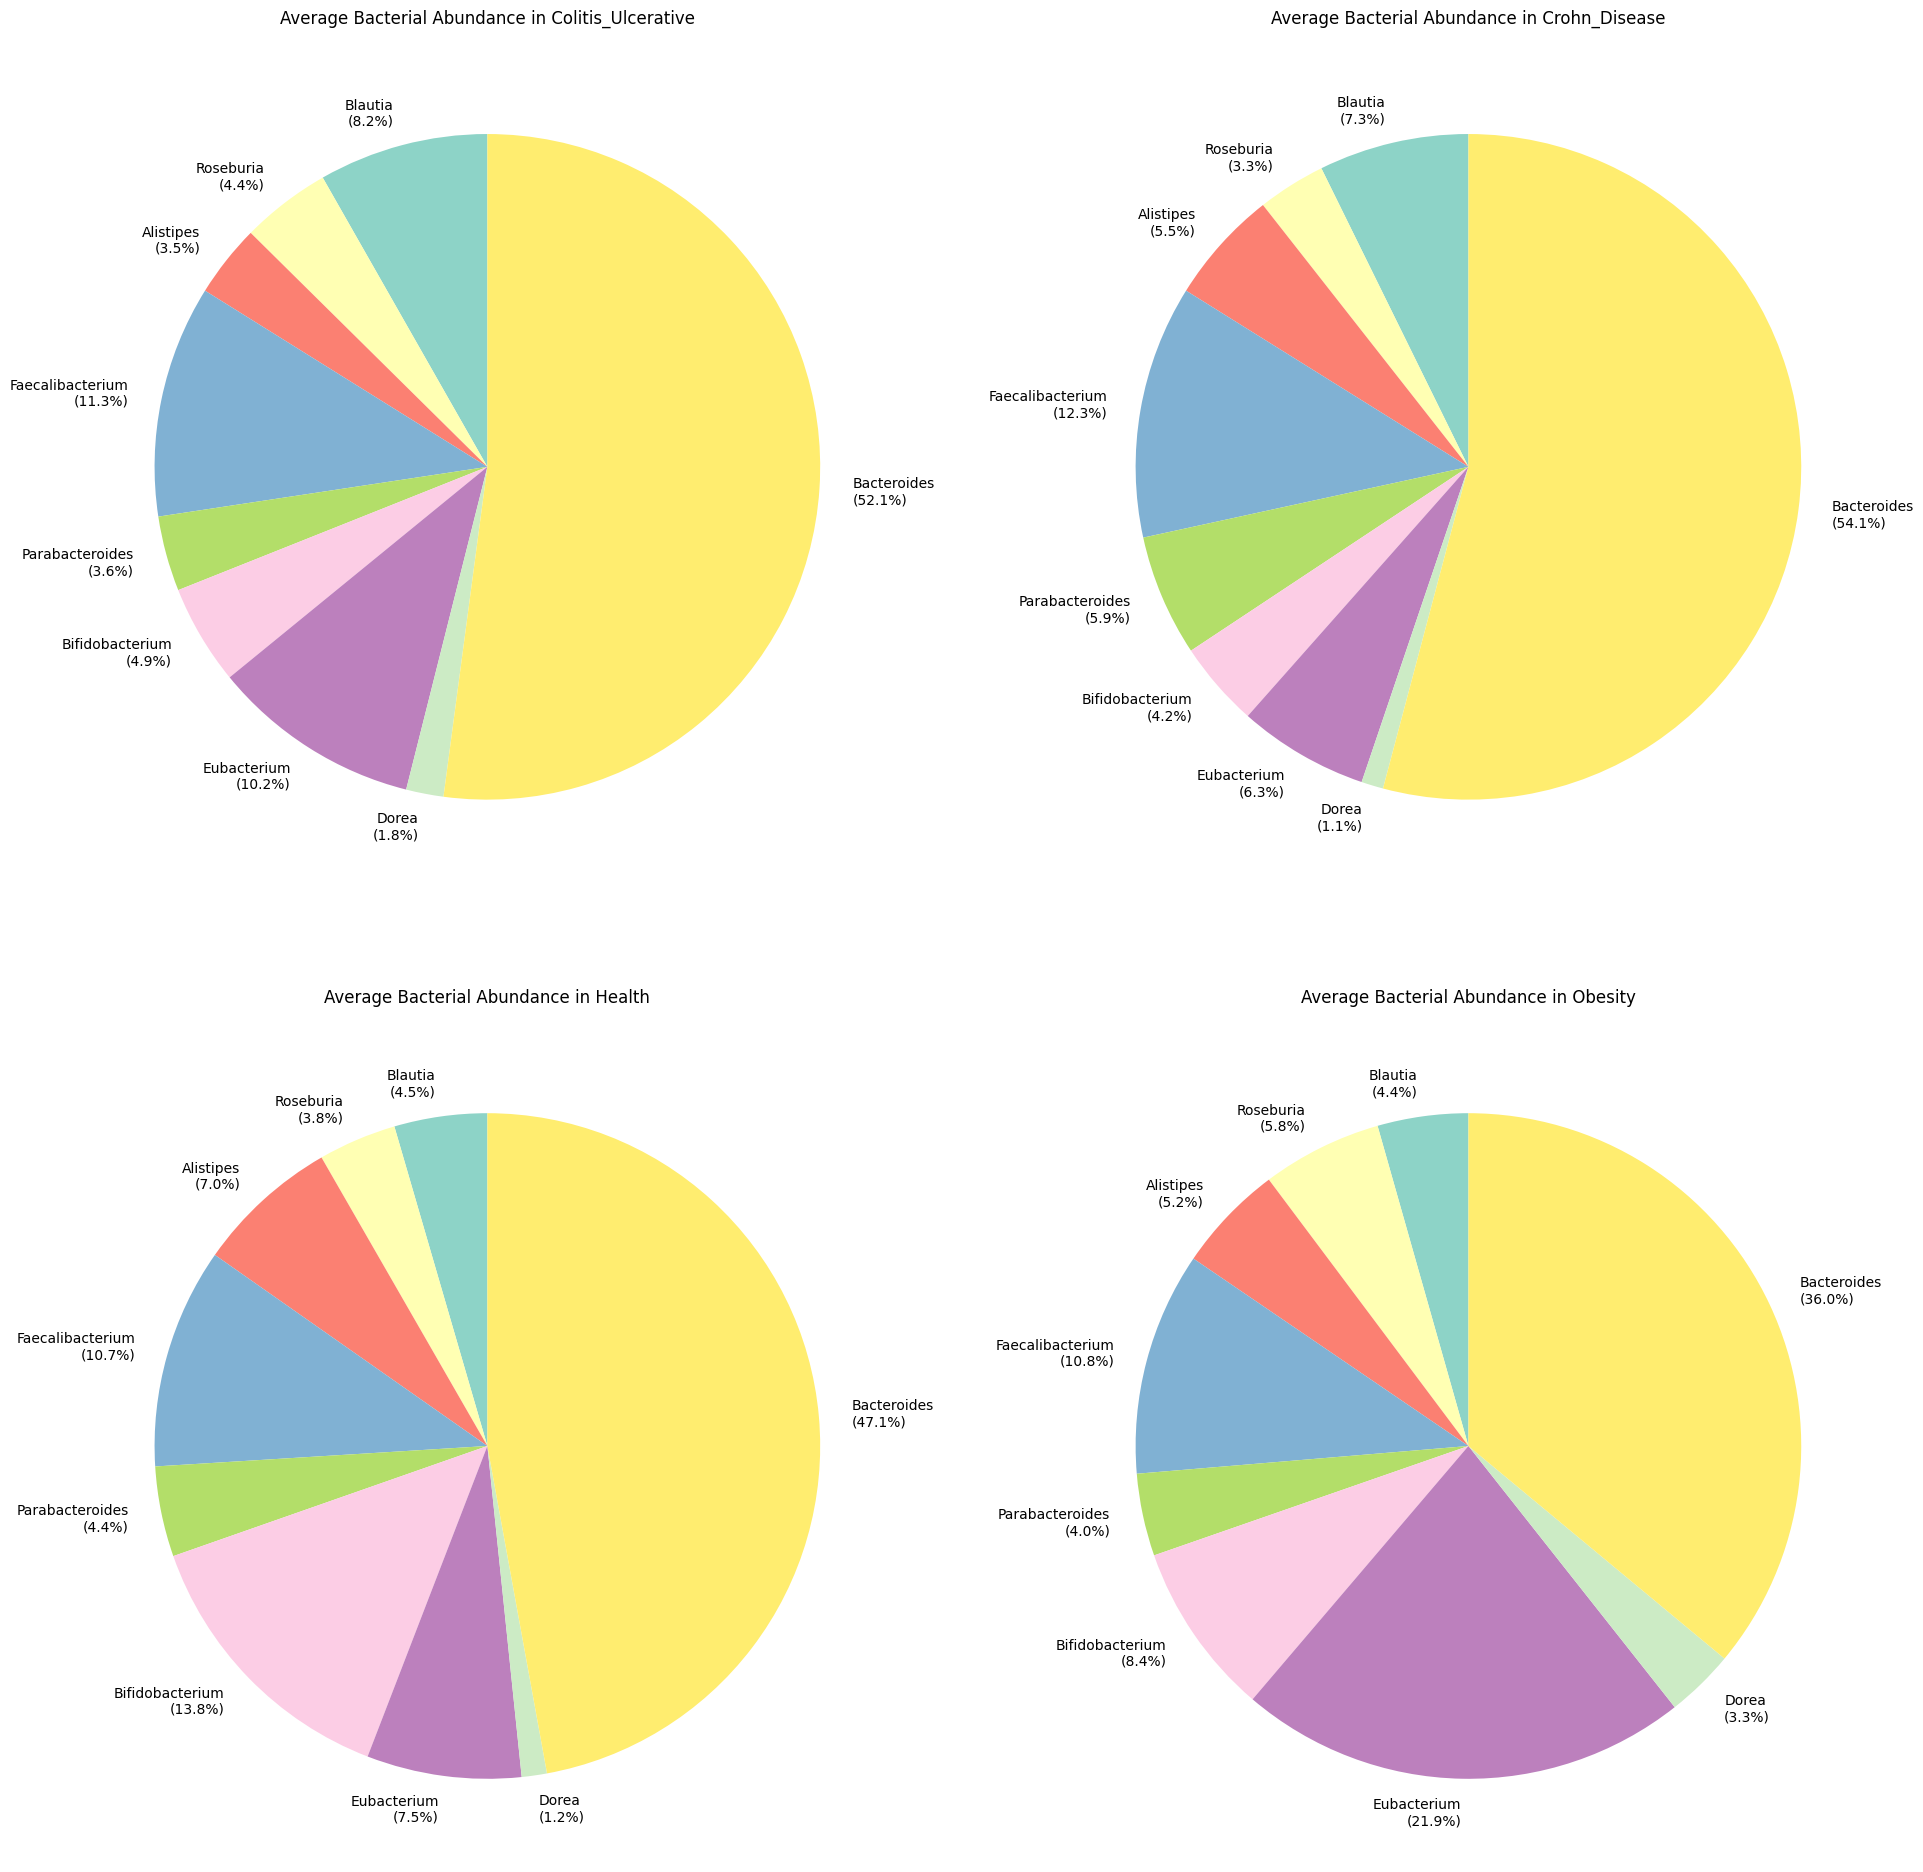


Mean abundance values for each bacteria by disease:
                    Blautia  Roseburia  Alistipes  Faecalibacterium  \
label                                                                 
Colitis_Ulcerative     4.39       2.32       1.88              6.01   
Crohn_Disease          4.56       2.07       3.46              7.70   
Health                 2.20       1.86       3.40              5.24   
Obesity                2.28       3.02       2.71              5.61   

                    Parabacteroides  Bifidobacterium  Eubacterium  Dorea  \
label                                                                      
Colitis_Ulcerative             1.95             2.59         5.43   0.97   
Crohn_Disease                  3.69             2.60         3.97   0.67   
Health                         2.14             6.73         3.67   0.60   
Obesity                        2.07             4.37        11.31   1.72   

                    Bacteroides  
label                        

In [18]:
# 计算每种疾病下各个菌的平均丰度
mean_abundances = combined_df.groupby('label')[abundance_columns].mean()

# 创建一个2x2的子图布局来显示4个饼图
plt.figure(figsize=(20, 20))

# 为每种疾病创建饼图
for idx, disease in enumerate(mean_abundances.index, 1):
    plt.subplot(2, 2, idx)
    
    # 获取当前疾病的菌群平均丰度
    values = mean_abundances.loc[disease]
    
    # 计算总和用于百分比计算
    total = values.sum()
    # 计算百分比
    percentages = (values / total) * 100
    
    # 绘制饼图
    plt.pie(percentages, 
            labels=[f'{name}\n({val:.1f}%)' for name, val in zip(abundance_columns, percentages)],
            autopct='',  # 不显示重复的百分比
            startangle=90,  # 从90度开始绘制
            colors=plt.cm.Set3(np.linspace(0, 1, len(abundance_columns))))  # 使用Set3颜色方案
    
    plt.title(f'Average Bacterial Abundance in {disease}', pad=20)

plt.tight_layout(pad=3.0)
plt.show()

# 打印具体数值
print("\nMean abundance values for each bacteria by disease:")
print(mean_abundances.round(2))

C:\Users\zhuzy\AppData\Local\Temp\ipykernel_10940\3663165779.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y=col, data=combined_df,
C:\Users\zhuzy\AppData\Local\Temp\ipykernel_10940\3663165779.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)  # 增大x轴刻度字体
C:\Users\zhuzy\AppData\Local\Temp\ipykernel_10940\3663165779.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='label', y=col, data=combined_df,
C:\Users\zhuzy\AppData\Local\Temp\ipykernel_10940\3663165779.py:30: UserWarning: set_ticklabels() shoul

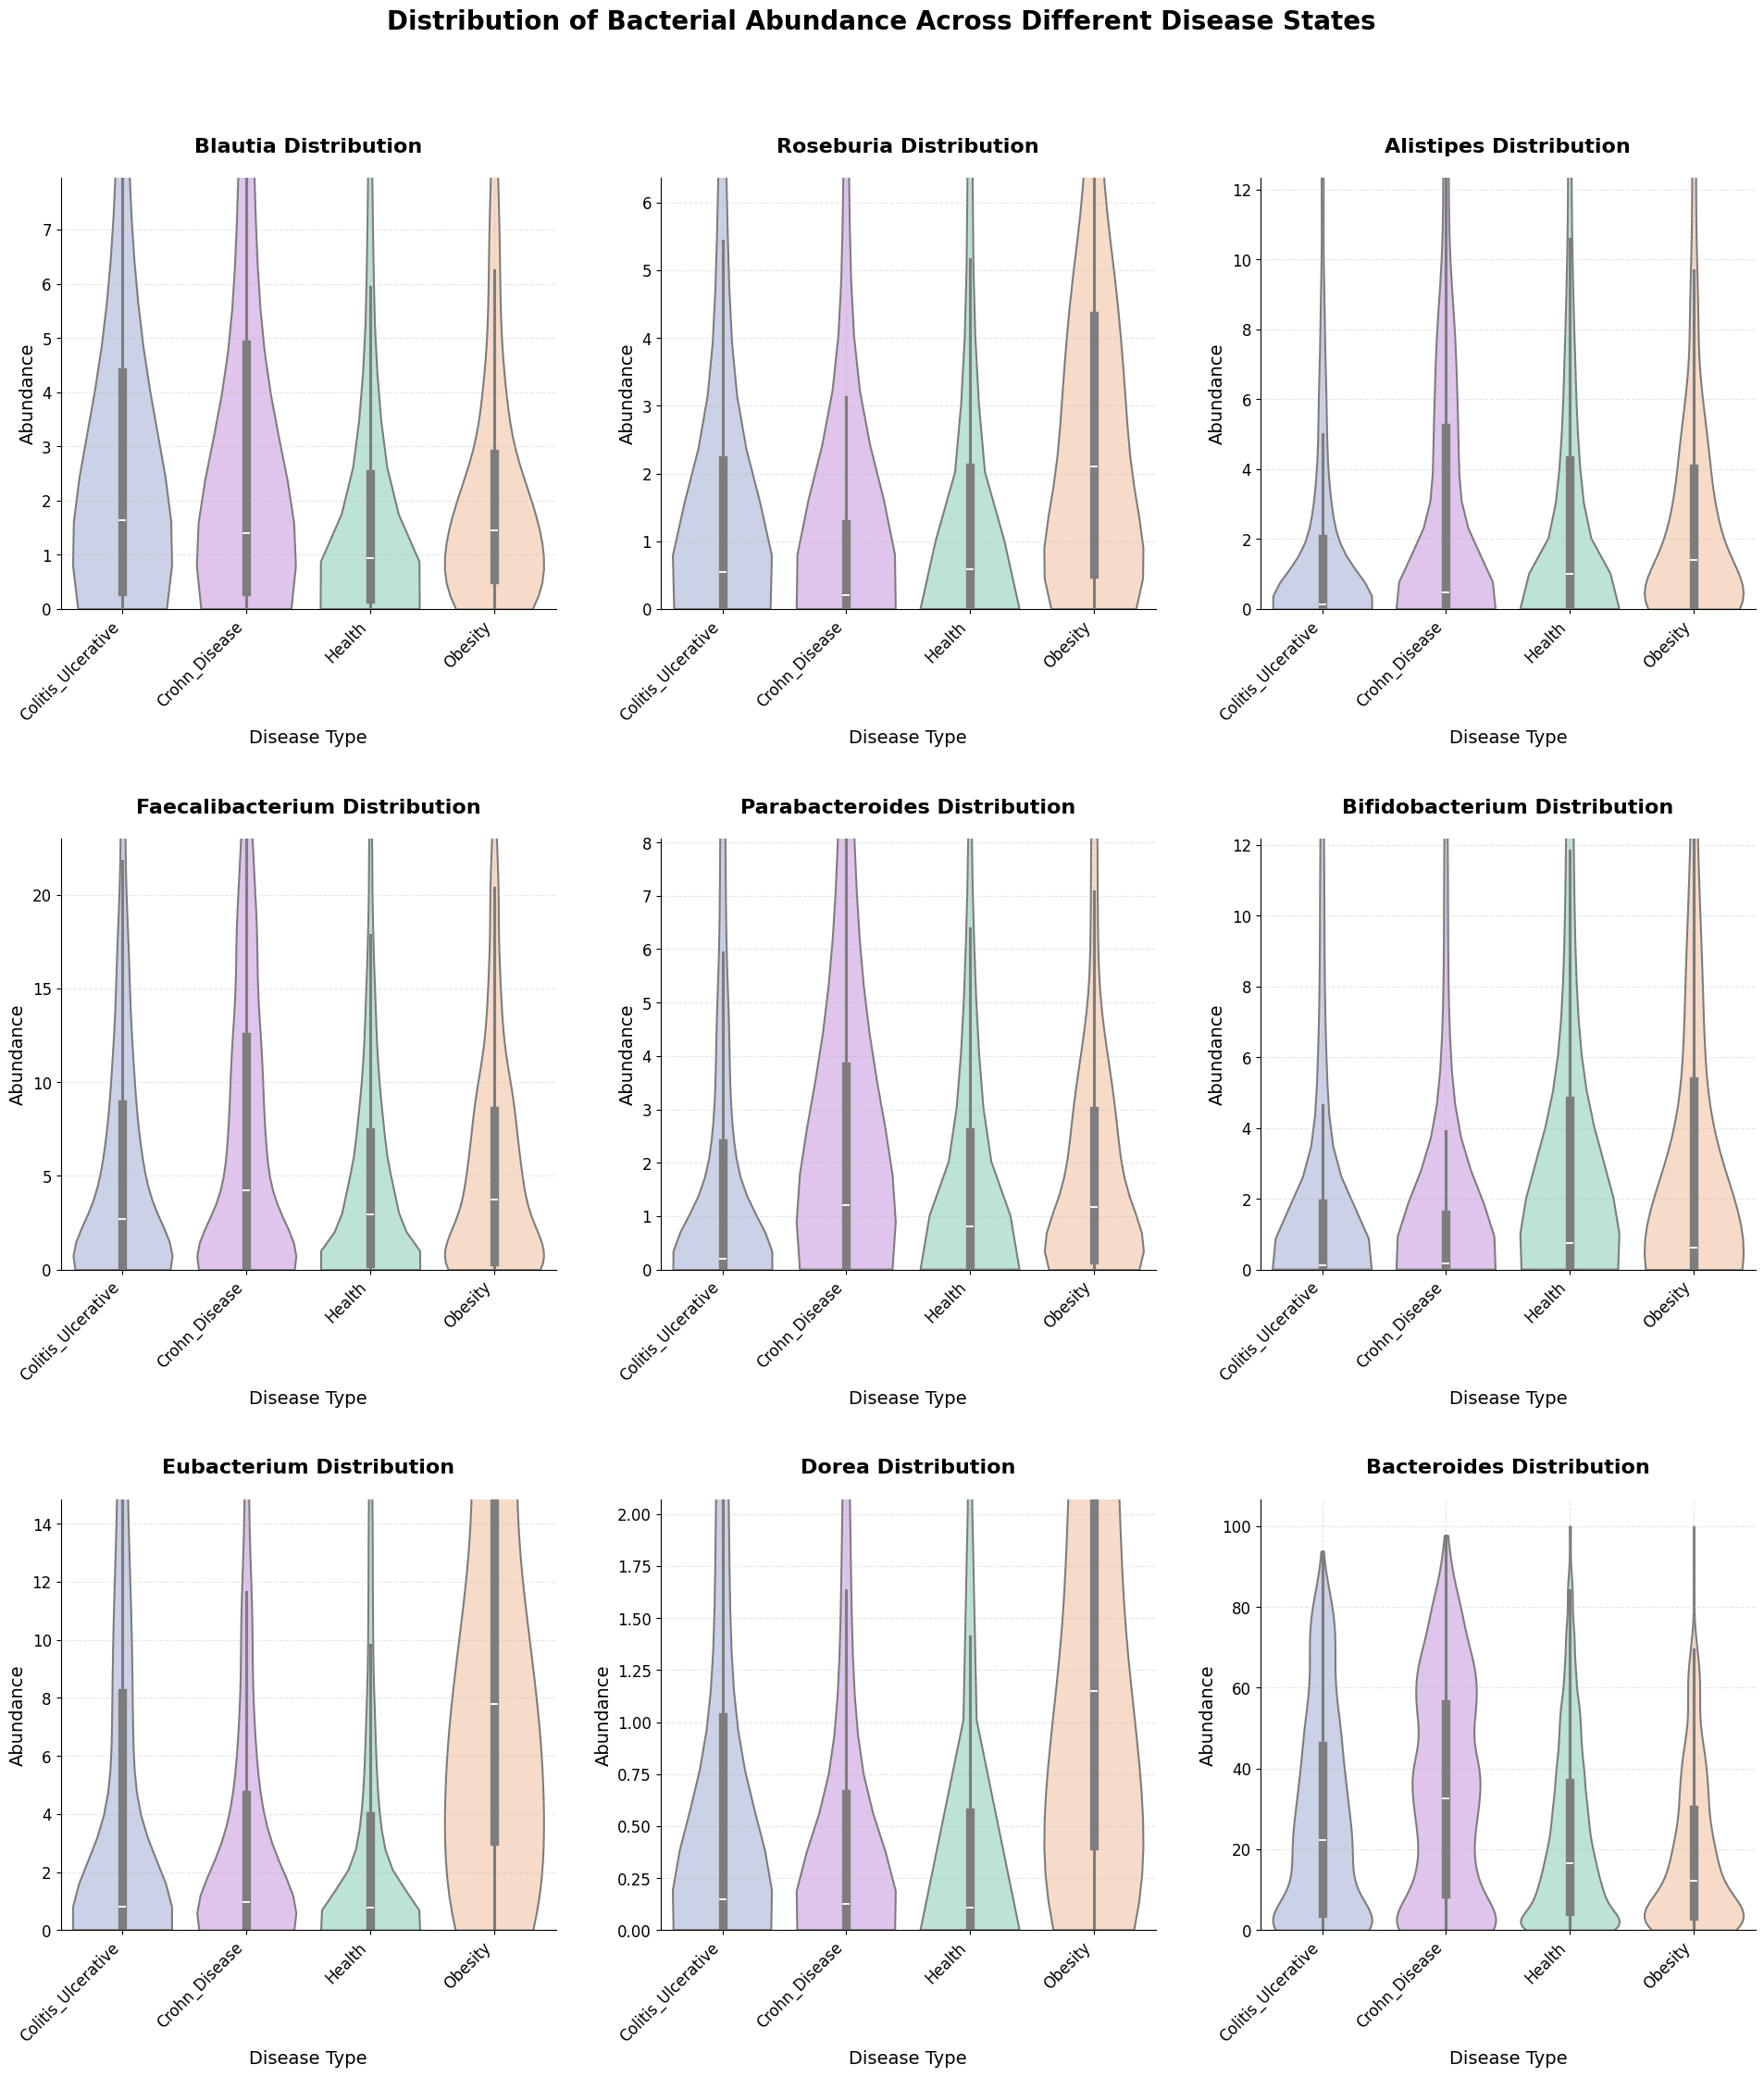

In [29]:
# 创建图表
fig, axes = plt.subplots(3, 3, figsize=(20, 24))

fig.suptitle('Distribution of Bacterial Abundance Across Different Disease States', fontsize=20, fontweight='bold', y=0.95)


# 定义柔和的颜色方案
colors = {
    'Colitis_Ulcerative': '#C7CEEA',
    'Crohn_Disease': '#E2BEF1',
    'Health': '#B5EAD7',
    'Obesity': '#FFDAC1'
}

for idx, (col, ax) in enumerate(zip(abundance_columns, axes.ravel())):
    # 绘制小提琴图
    sns.violinplot(x='label', y=col, data=combined_df,
                   ax=ax,
                   palette=colors,
                   inner='box',
                   cut=0,
                   linewidth=1.5)
    
    # 设置标题和标签
    ax.set_title(f'{col} Distribution', pad=20, fontsize=16, fontweight='bold')
    ax.set_xlabel('Disease Type', fontsize=14)  # 增大x轴标签字体
    ax.set_ylabel('Abundance', fontsize=14)     # 增大y轴标签字体
    
    # 调整x轴刻度标签
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)  # 增大x轴刻度字体
    
    # 调整y轴刻度标签字体大小
    ax.tick_params(axis='y', labelsize=12)  # 增大y轴刻度字体
    
    # 设置y轴范围
    q1 = combined_df[col].quantile(0.25)
    q3 = combined_df[col].quantile(0.75)
    iqr = q3 - q1
    ax.set_ylim(max(0, q1 - 1.5 * iqr), q3 + 2.0 * iqr)
    
    # 添加网格线
    ax.grid(True, linestyle='--', alpha=0.3)
    
    # 美化边框
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# 调整子图之间的间距
plt.tight_layout(pad=4.0, h_pad=4.0, w_pad=3.0, rect=[0, 0, 1, 0.95])

plt.show()

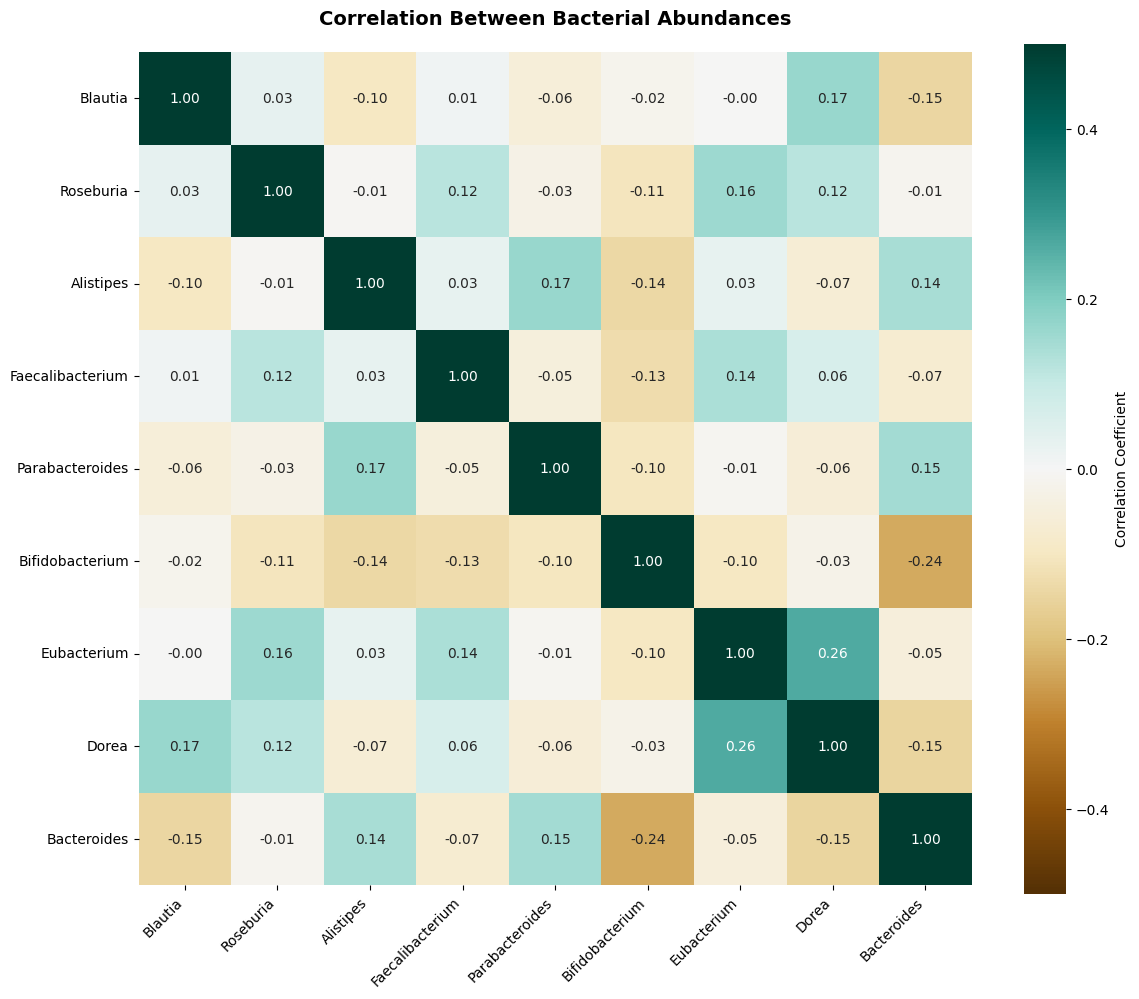

In [28]:
plt.figure(figsize=(12, 10))

# 计算相关性矩阵
correlation = combined_df[abundance_columns].corr()

# 创建自定义颜色映射
colors = sns.color_palette("BrBG", as_cmap=True)  # 使用红白蓝配色方案

# 创建热图
sns.heatmap(correlation, 
            annot=True,                    # 显示数值
            cmap=colors,                   # 使用自定义配色
            center=0,                      # 将0设为中心点
            vmin=-0.5,                     # 设置颜色范围最小值
            vmax=0.5,                      # 设置颜色范围最大值
            fmt='.2f',                     # 保留两位小数
            square=True,                   # 保持方形
            annot_kws={'size': 10},        # 调整数字大小
            cbar_kws={'label': 'Correlation Coefficient'})

# 调整x轴标签
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# 设置标题
plt.title('Correlation Between Bacterial Abundances', 
          pad=20,
          fontsize=14,
          fontweight='bold')

# 调整布局
plt.tight_layout()
plt.show()

Sample counts after balancing:
label
Health                3130
Crohn_Disease         1920
Colitis_Ulcerative    1840
Obesity                935
Name: count, dtype: int64


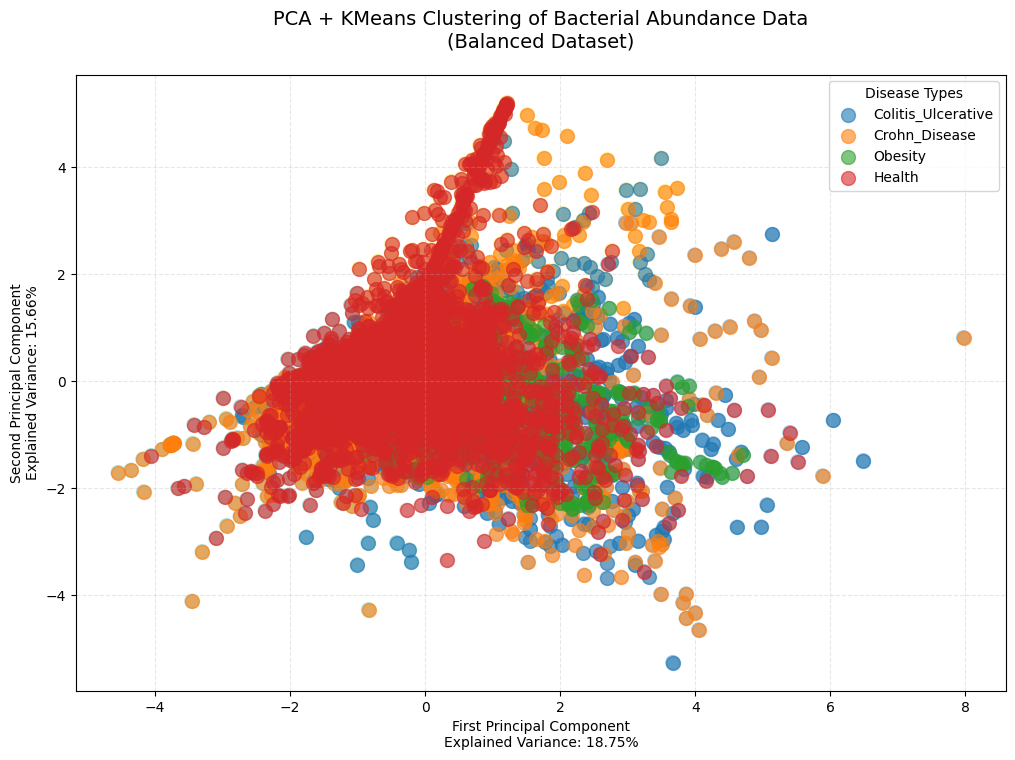

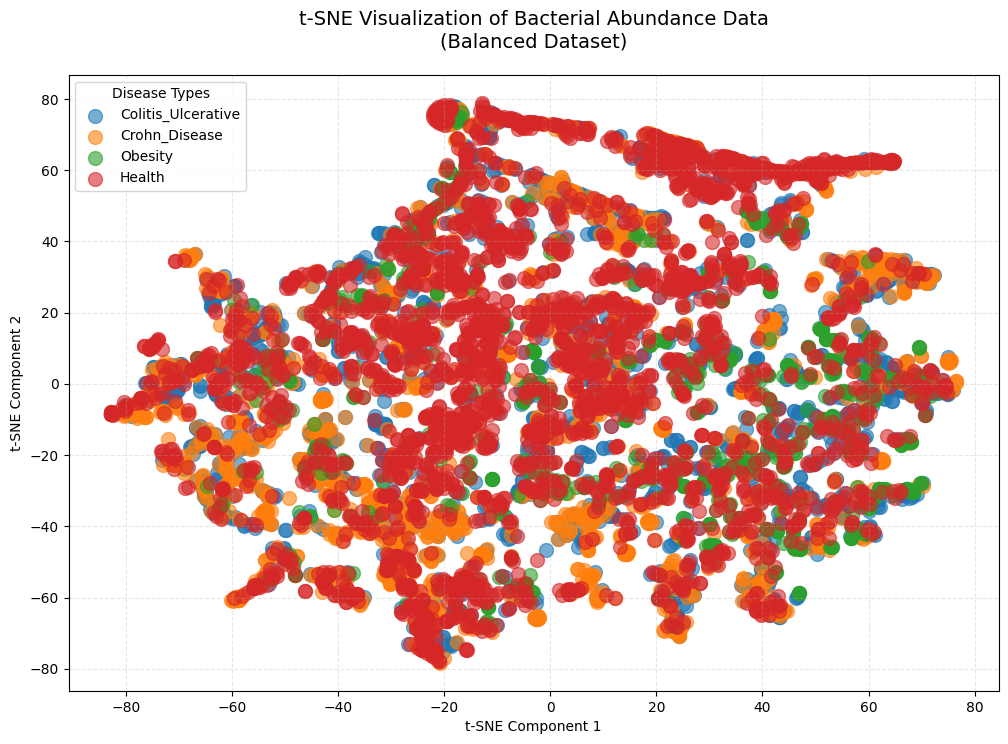

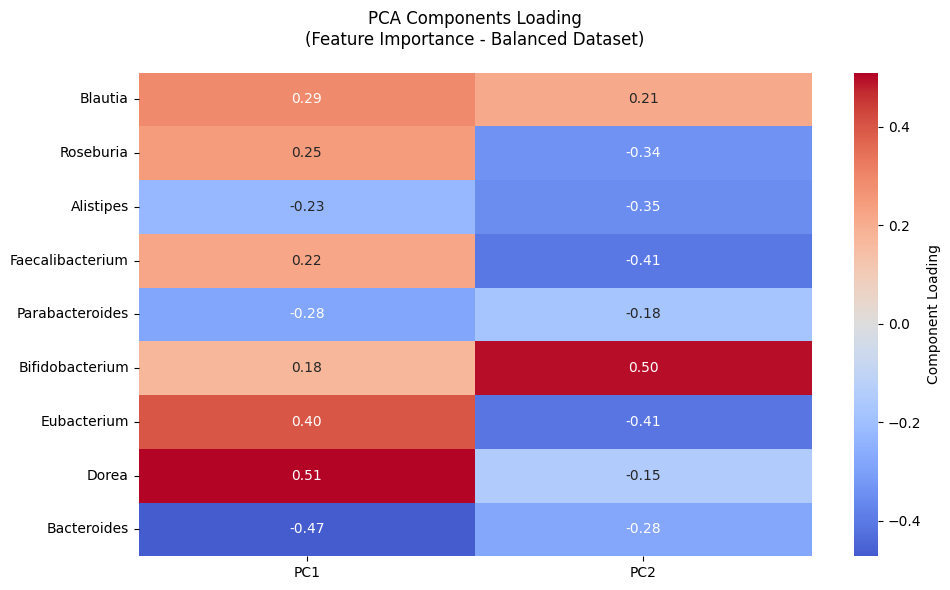


Explained variance ratio by principal components:
PC1: 18.75%
PC2: 15.66%


In [37]:
# 计算非Health类别的平均样本数
non_health_counts = combined_df[combined_df['label'] != 'Health']['label'].value_counts()
avg_non_health = int(non_health_counts.mean() * 2)  # 取其他类别平均值的两倍

# 获取Health样本
health_samples = combined_df[combined_df['label'] == 'Health']
non_health_samples = combined_df[combined_df['label'] != 'Health']

# 随机抽取Health样本
np.random.seed(42)  # 设置随机种子以确保可重复性
health_samples_balanced = health_samples.sample(n=avg_non_health)

# 合并数据
balanced_df = pd.concat([non_health_samples, health_samples_balanced])

# 打印各类别的样本数量
print("Sample counts after balancing:")
print(balanced_df['label'].value_counts())

# 更新abundance_data
abundance_data = balanced_df[abundance_columns]

# 继续之前的分析...
# 数据预处理
X = abundance_data.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans聚类
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# 可视化PCA结果
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, 
                     cmap='Set3', alpha=0.6, s=100)
plt.title('PCA + KMeans Clustering of Bacterial Abundance Data\n(Balanced Dataset)', 
          fontsize=14, pad=20)
plt.xlabel(f'First Principal Component\nExplained Variance: {pca.explained_variance_ratio_[0]:.2%}')
plt.ylabel(f'Second Principal Component\nExplained Variance: {pca.explained_variance_ratio_[1]:.2%}')

# 添加真实标签的图例
for disease in balanced_df['label'].unique():
    mask = balanced_df['label'] == disease
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=disease, alpha=0.6, s=100)
plt.legend(title='Disease Types')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# t-SNE可视化
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(12, 8))
for disease in balanced_df['label'].unique():
    mask = balanced_df['label'] == disease
    plt.scatter(X_tsne[mask, 0], X_tsne[mask, 1], label=disease, alpha=0.6, s=100)

plt.title('t-SNE Visualization of Bacterial Abundance Data\n(Balanced Dataset)', 
          fontsize=14, pad=20)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Disease Types')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 特征重要性分析
pca_components = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=abundance_columns
)

plt.figure(figsize=(10, 6))
sns.heatmap(pca_components, cmap='coolwarm', center=0,
            annot=True, fmt='.2f', cbar_kws={'label': 'Component Loading'})
plt.title('PCA Components Loading\n(Feature Importance - Balanced Dataset)', pad=20)
plt.tight_layout()
plt.show()

# 输出解释方差比例
print("\nExplained variance ratio by principal components:")
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.2%}")